<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [8]:
#load the data
df = pd.read_csv('/content/marketing_campaign.csv', delimiter='\t')

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
# Select relevant features for clustering
features = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases']]

In [16]:
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean of the column
features_imputed = imputer.fit_transform(features)

In [17]:
# Scale the features to bring them to a similar scale
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

## K-Means Clustering

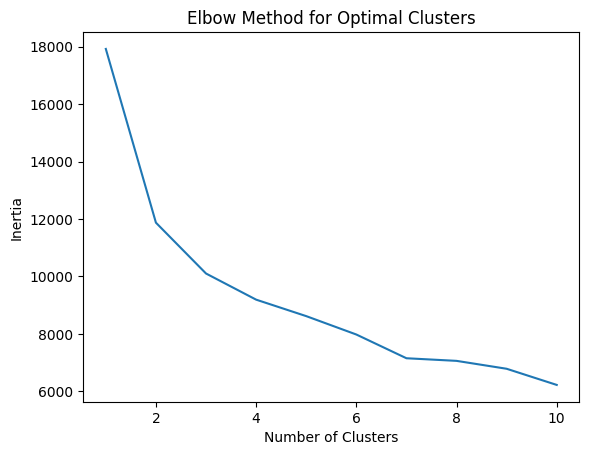

In [18]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):  # Test for clusters from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [19]:
# Applying KMeans with the optimal number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Inspect the resulting clusters
print(df[['ID', 'Cluster']].head())


     ID  Cluster
0  5524        1
1  2174        0
2  4141        1
3  6182        0
4  5324        0


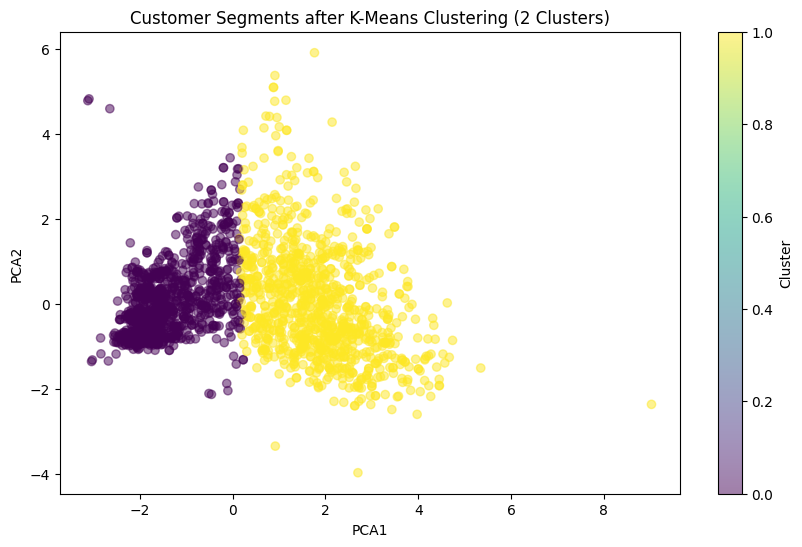

In [20]:
# Reduce the dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Add PCA components to the dataframe for easy visualization
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Customer Segments after K-Means Clustering (2 Clusters)')
plt.colorbar(label='Cluster')
plt.show()
